# COMPETITION

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data=pd.read_csv('Income_prediction.csv')

In [55]:
data.head(25)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [56]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [57]:
data=data.drop(['race','sex','relationship','marital.status'],axis=1)

In [58]:
data.head(25)

,age,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,?,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Exec-managerial,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,?,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Prof-specialty,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Other-service,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Adm-clerical,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Prof-specialty,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Prof-specialty,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Craft-repair,0,3004,60,?,>50K


In [59]:
data.head(25)

,age,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,?,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Exec-managerial,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,?,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Prof-specialty,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Other-service,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Adm-clerical,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Prof-specialty,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Prof-specialty,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Craft-repair,0,3004,60,?,>50K


In [62]:
data['income']=data['income'].replace(to_replace="<=50K",value=0)


In [64]:
data['income']=data['income'].replace(to_replace=">50K",value=1)

In [65]:
data.head(25)

,age,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,?,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Exec-managerial,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,?,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Machine-op-inspct,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Prof-specialty,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Other-service,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Adm-clerical,0,3770,40,United-States,0
7,74,State-gov,88638,Doctorate,16,Prof-specialty,0,3683,20,United-States,1
8,68,Federal-gov,422013,HS-grad,9,Prof-specialty,0,3683,40,United-States,0
9,41,Private,70037,Some-college,10,Craft-repair,0,3004,60,?,1


In [66]:
data3=pd.get_dummies(data)

In [67]:
data3.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [68]:
x=data3.drop(['income'],axis=1)

In [69]:
y=data3['income']

In [71]:
x

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,132870,9,0,4356,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,66,186061,10,0,4356,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [72]:
y


0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   capital.gain    32561 non-null  int64 
 7   capital.loss    32561 non-null  int64 
 8   hours.per.week  32561 non-null  int64 
 9   native.country  32561 non-null  object
 10  income          32561 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 2.7+ MB


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

# Logistic Regressiion

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(accuracy_score(y_test,y_pred))


0.7935143102812923


In [78]:
print('accuracy =',accuracy_score(y_test,y_pred))
print('precision  =',precision_score(y_test,y_pred))
print('recall  =',recall_score(y_test,y_pred))
print('f1  =',f1_score(y_test,y_pred))

accuracy = 0.7935143102812923
precision  = 0.7240896358543417
recall  = 0.25837081459270367
f1  = 0.3808471454880295


# Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)

In [81]:
print('accuracy =',accuracy_score(y_test,y_pred))
print('precision  =',precision_score(y_test,y_pred))
print('recall  =',recall_score(y_test,y_pred))
print('f1  =',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

accuracy = 0.7829504974818818
precision  = 0.5589123867069486
recall  = 0.5547226386806596
f1  = 0.5568096313017306
Confusion matrix


array([[5264,  876],
       [ 891, 1110]])

# Random Forest 

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [84]:
print('accuracy =',accuracy_score(y_test,y_pred))
print('precision  =',precision_score(y_test,y_pred))
print('recall  =',recall_score(y_test,y_pred))
print('f1  =',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

accuracy = 0.823731728288908
precision  = 0.6847258485639687
recall  = 0.5242378810594702
f1  = 0.5938296065666573
Confusion matrix


array([[5657,  483],
       [ 952, 1049]])

# KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k=[]
neighbors=np.arange(1,40)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    metric_k.append(acc)

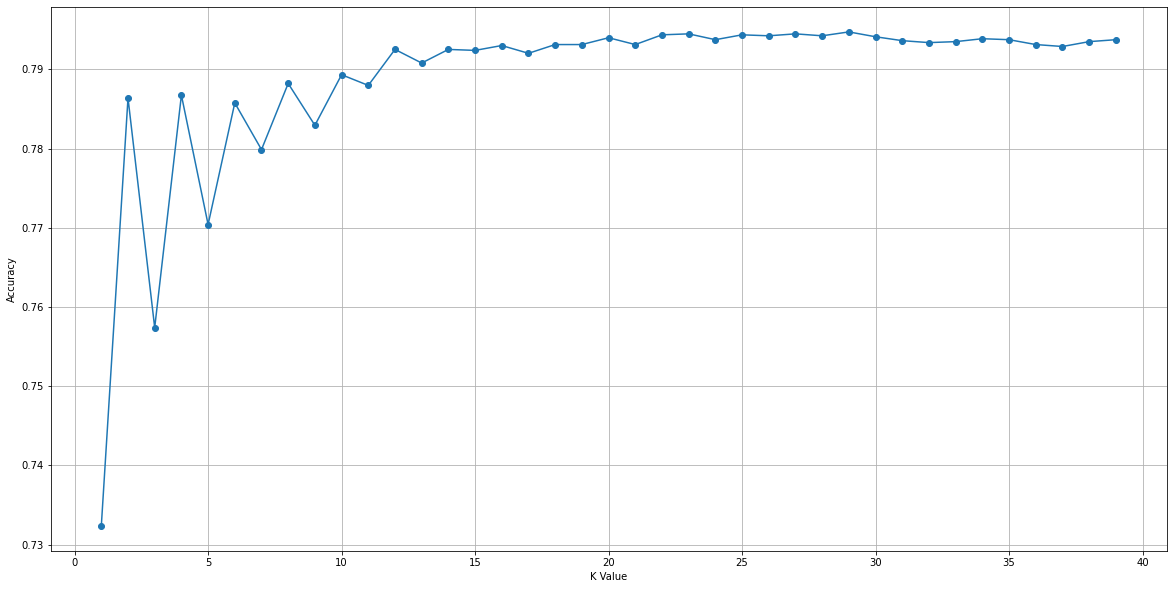

In [48]:
plt.figure(figsize=(20,10)) 
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid()

In [49]:
classifier=KNeighborsClassifier(n_neighbors=29,metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [50]:
cm=confusion_matrix(y_test,y_pred)

In [51]:
print('accuracy =',accuracy_score(y_test,y_pred))
print('precision  =',precision_score(y_test,y_pred))
print('recall  =',recall_score(y_test,y_pred))
print('f1  =',f1_score(y_test,y_pred))


accuracy = 0.7947426606068051
precision  = 0.8733031674208145
recall  = 0.19290354822588707
f1  = 0.31600491199345065


# Support Vector Machine

In [52]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [53]:
print('accuracy =',accuracy_score(y_test,y_pred))
print('precision  =',precision_score(y_test,y_pred))
print('recall  =',recall_score(y_test,y_pred))
print('f1  =',f1_score(y_test,y_pred))
print('Confusion matrix')
confusion_matrix(y_test,y_pred)

accuracy = 0.7886009089792408
precision  = 0.9861111111111112
recall  = 0.14192903548225888
f1  = 0.24814329401485366
Confusion matrix


array([[6136,    4],
       [1717,  284]])

# RANDOM FOREST IS THE BEST MODEL